In [29]:
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

# Import numpy
import numpy as np

# Import pandas for data handling
import pandas as pd

import os

# Import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [30]:
from train_valid_test_loader import load_train_valid_test_datasets

DATA_PATH = 'data_movie_lens_100k/' # TODO fixme: Path to where dataset csv files live on your system (unless in working directory)
assert os.path.exists(os.path.join(DATA_PATH, 'select_movies.csv'))

In [31]:
# Importing the movie dataset
train_tuple, test_tuple, valid_tuple, n_users, n_items = load_train_valid_test_datasets(data_path=DATA_PATH)

# Check size of each split
n_train = len(train_tuple[0])
n_valid = len(valid_tuple[0])
n_test = len(test_tuple[0])

print("n_train", f"{n_train}")
print("n_valid", f"{n_valid}")
print("n_test", f"{n_test}")

n_train 70000
n_valid 10000
n_test 9992


In [32]:
# Create the model
model = CollabFilterOneVectorPerItem(n_epochs=6, batch_size=10000, step_size=0.1, n_factors=2)

# Initialize the parameters
model.init_parameter_dict(n_users, n_items, train_tuple)
hasattr(model, 'param_dict')

True

In [33]:
model.param_dict

{'mu': array([1.]),
 'b_per_user': array([1.]),
 'c_per_item': array([1.]),
 'U': array([-0.00061335]),
 'V': array([0.00087656])}

In [34]:
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     0.00000 | tr RMSE     2.76970 | va RMSE     2.74794 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.143 | loss_total     0.00000 | tr RMSE     2.76970 | va RMSE     2.74794 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.286 | loss_total     0.00000 | tr RMSE     2.76970 | va RMSE     2.74794 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.429 | loss_total     0.00000 | tr RMSE     2.76970 | va RMSE     2.74794 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.571 | loss_total     0.00000 | tr RMSE     2.76970 | va RMSE  

/opt/miniconda3/envs/cs135_25s_env/lib/python3.11/site-packages/autograd/tracer.py:16: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


In [35]:
# Here we show at which epochs we collected a snapshot of model performance
model.trace_epoch

[0.0,
 0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857142,
 0.857142857142857,
 1.0,
 1.1428571428571428,
 1.2857142857142856,
 1.4285714285714284,
 1.5714285714285712,
 1.714285714285714,
 1.8571428571428568,
 2.0,
 2.571428571428571,
 3.0,
 3.571428571428571,
 4.0,
 4.571428571428573,
 5.0,
 5.571428571428573,
 5.857142857142859]

In [36]:
model.trace_rmse_train

[2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171,
 2.769700860588171]

(0.0, 3.0)

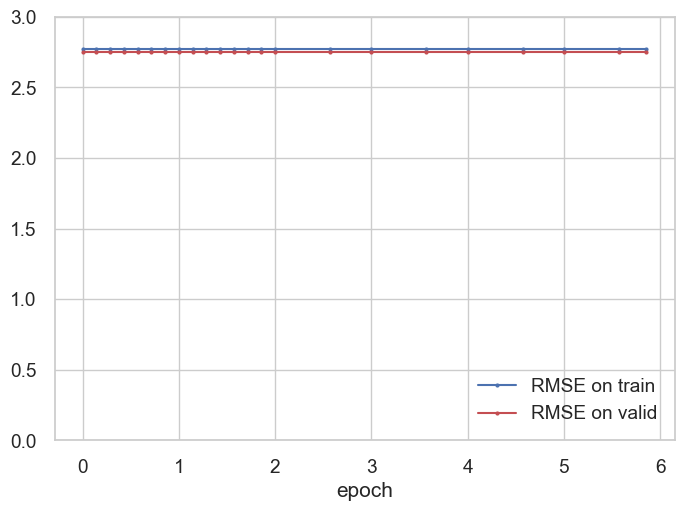

In [37]:
# Plots to Look at error vs. epoch

plt.plot(model.trace_epoch, model.trace_rmse_train, 'b.-', label='RMSE on train')
plt.plot(model.trace_epoch, model.trace_rmse_valid, 'r.-', label='RMSE on valid')

plt.xlabel('epoch');
plt.legend(loc='lower right');
plt.ylim([0, 3])